## Small Image Classification Using Convolutional Neural Network (CNN)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets , layers, models

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


## The dataset have images of 10 different objects.

In [3]:
X_train.shape

(50000, 32, 32, 3)

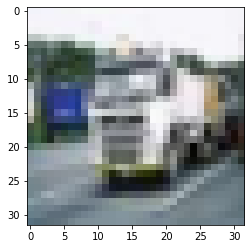

In [4]:
plt.imshow(X_train[1000]) # here, we do not have any label, we will get it ....

In [5]:
X_test.shape

(10000, 32, 32, 3)

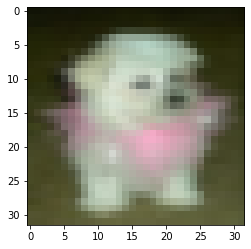

In [6]:
plt.imshow(X_test[3000])

# Here we see there are 50,000 training images and 10,000 test images

In [7]:
type(y_train)

numpy.ndarray

In [8]:
y_train[:10] # 2D array........

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)   # now we have a 1D arry insted of 2D......
y_train[:10]
y_test = y_test.reshape(-1,)

In [10]:
#  dir(y_train)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_img(X,y,index):
  plt.figure(figsize = (20,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

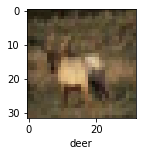

In [13]:
plot_img(X_train,y_train,3) # here in the botton you can see that we are getting a label for the object.....

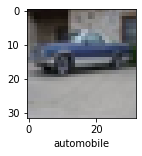

In [14]:
plot_img(X_train,y_train,10000)

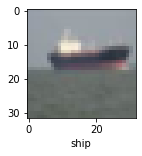

In [15]:
plot_img(X_train,y_train,69)

In [16]:
# scalining the dataset as it will help to get more accuracy.
X_train = X_train/255
X_test = X_test/255

In [17]:
# now we are all set to make our Neural Network.
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),   # 3000 neurons are used 
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
      loss='sparse_categorical_crossentropy',  # here we use sparse_categorical_crossentropy as we have not converted out y_data points to a vector matrix.
      metrics=['accuracy']) # focus on getting more accuracy.

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8145 - accuracy: 0.3523
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6228 - accuracy: 0.4281
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5451 - accuracy: 0.4559
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4836 - accuracy: 0.4807
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4338 - accuracy: 0.4957
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3905 - accuracy: 0.5132
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3518 - accuracy: 0.5237
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3176 - accuracy: 0.5371
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2846 - accuracy: 0.5496
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.254

***After 10 epochs the accuracy is 56.20% and loss is 1.2540.***

In [18]:
ann.evaluate(X_test,y_test) # on test set I have almost 50% accuracy and loss of 1.36..

313/313 [==============================] - 1s 3ms/step - loss: 1.3692 - accuracy: 0.5066


[1.3692106008529663, 0.506600022315979]

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.52      0.55      1000
           1       0.72      0.52      0.61      1000
           2       0.44      0.38      0.41      1000
           3       0.31      0.56      0.40      1000
           4       0.44      0.48      0.46      1000
           5       0.52      0.22      0.31      1000
           6       0.61      0.53      0.57      1000
           7       0.74      0.45      0.56      1000
           8       0.48      0.78      0.60      1000
           9       0.54      0.63      0.58      1000

    accuracy                           0.51     10000
   macro avg       0.54      0.51      0.50     10000
weighted avg       0.54      0.51      0.50     10000



In [20]:
cnn = models.Sequential([
    # CNN for feature identification                     
    layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # dense at the end 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 4ms/step - loss: 1.4181 - accuracy: 0.4932
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0706 - accuracy: 0.6251
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9482 - accuracy: 0.6701
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8573 - accuracy: 0.7018
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7871 - accuracy: 0.7260
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7233 - accuracy: 0.7482
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6705 - accuracy: 0.7638
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6175 - accuracy: 0.7860
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5763 - accuracy: 0.7975
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.52

## Accuracy - 81.35% and loss - 0.5293 # CNN Rocks

## **CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [23]:
cnn.evaluate(X_test,y_test) # 69.59% accuracy for our test set.

313/313 [==============================] - 2s 4ms/step - loss: 0.9565 - accuracy: 0.6959


[0.9565059542655945, 0.695900022983551]

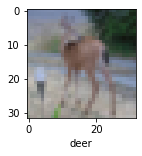

In [24]:
plot_img(X_test, y_test,100)

In [26]:
classes[y_test[100]]  # COOL >>>>>>>>

'deer'

In [27]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.81      0.73      1000
           1       0.84      0.79      0.82      1000
           2       0.69      0.50      0.58      1000
           3       0.52      0.47      0.49      1000
           4       0.64      0.69      0.66      1000
           5       0.50      0.70      0.58      1000
           6       0.83      0.73      0.78      1000
           7       0.75      0.76      0.75      1000
           8       0.90      0.72      0.80      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

